<a href="https://colab.research.google.com/github/SaanviGoel30/Options-Pricing-Model/blob/main/Payoff_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRODUCTION TO OPTIONS**

In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import warnings
import yfinance as yf

# Suppress warnings
warnings.filterwarnings("ignore")

**Importing Options Data**

In [3]:
symbol = "^SPX"
dfo = yf.Ticker(symbol)

# Get current price using historical data (more reliable than info)
current_price = dfo.history(period='1d')['Close'].iloc[-1]

# Select the next recent expiration date
expiration_date = dfo.options[1]
option_chain = dfo.option_chain(expiration_date)

# Extract Calls and Puts Data
calls = option_chain.calls
puts = option_chain.puts

**Call Option Data**

In [4]:
calls


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250114C05000000,2025-01-08 16:13:30+00:00,5000.0,907.97,814.3,830.4,0.00000,0.00000,2.0,4,0.726077,True,REGULAR,USD
1,SPXW250114C05150000,2025-01-10 18:04:12+00:00,5150.0,685.83,664.4,682.8,-173.78998,-20.21707,1.0,5,0.663944,True,REGULAR,USD
2,SPXW250114C05300000,2025-01-06 15:07:39+00:00,5300.0,708.83,514.9,533.1,0.00000,0.00000,1.0,5,0.539677,True,REGULAR,USD
3,SPXW250114C05400000,2025-01-08 16:03:48+00:00,5400.0,506.16,416.6,428.8,0.00000,0.00000,4.0,2,0.361701,True,REGULAR,USD
4,SPXW250114C05575000,2025-01-10 19:09:11+00:00,5575.0,271.78,243.3,255.4,-128.70000,-32.13640,1.0,1,0.259254,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,SPXW250114C06700000,2025-01-06 16:11:12+00:00,6700.0,0.05,0.0,0.1,0.00000,0.00000,10.0,10,0.440435,False,REGULAR,USD
94,SPXW250114C06800000,2025-01-03 17:26:38+00:00,6800.0,0.05,0.0,0.1,0.00000,0.00000,60.0,63,0.482915,False,REGULAR,USD
95,SPXW250114C07000000,2025-01-08 14:38:23+00:00,7000.0,0.05,0.0,0.1,0.00000,0.00000,10.0,312,0.535161,False,REGULAR,USD
96,SPXW250114C07200000,2024-12-16 17:47:03+00:00,7200.0,0.10,0.0,0.1,0.00000,0.00000,NaN,10,0.609379,False,REGULAR,USD


In [5]:
puts


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250114P02400000,2024-12-27 14:36:25+00:00,2400.0,0.07,0.0,0.1,0.00000,0.000000,3.0,16,2.406254,False,REGULAR,USD
1,SPXW250114P02600000,2024-12-26 15:30:26+00:00,2600.0,0.05,0.0,0.1,0.00000,0.000000,1.0,19,2.195317,False,REGULAR,USD
2,SPXW250114P03000000,2024-12-31 16:35:10+00:00,3000.0,0.05,0.0,0.1,0.00000,0.000000,1.0,45,1.820313,False,REGULAR,USD
3,SPXW250114P03200000,2024-12-27 17:07:39+00:00,3200.0,0.25,0.0,0.1,0.00000,0.000000,1.0,35,1.652345,False,REGULAR,USD
4,SPXW250114P03400000,2025-01-02 18:16:29+00:00,3400.0,0.15,0.0,0.1,0.00000,0.000000,21.0,147,1.492190,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,SPXW250114P06160000,2024-12-18 16:23:50+00:00,6160.0,341.51,326.6,346.1,230.77002,208.389040,1.0,1,0.421804,True,REGULAR,USD
145,SPXW250114P06175000,2024-12-30 15:05:33+00:00,6175.0,287.57,341.6,361.1,0.00000,0.000000,10.0,10,0.434988,True,REGULAR,USD
146,SPXW250114P06200000,2024-12-26 20:07:11+00:00,6200.0,149.70,367.5,386.1,0.00000,0.000000,NaN,1,0.456701,True,REGULAR,USD
147,SPXW250114P06225000,2024-12-30 15:05:33+00:00,6225.0,337.01,391.9,410.1,0.00000,0.000000,10.0,10,0.468404,True,REGULAR,USD


## **Payoff Calculation**

 **Call option**

payoff=max(-C, S - X - C)


 **Put option**

payoff=max(-P, X - S - P)


where,

P and C are premiums of calls and puts

S is the stock price

X is the strike price

In [6]:
def payoff(option_type, premium, S, X):
    """
    Calculate the payoff for an option position

    Parameters:
    option_type (str): 'C' for Call, 'P' for Put
    premium (float): Option premium
    S (array): Array of possible stock prices
    X (float): Strike price
    """
    payoff_value = 0
    if option_type == 'C':  # Call Option
        payoff_value = np.maximum(S-X, 0) - premium
    elif option_type == 'P':  # Put Option
        payoff_value = np.maximum(X-S, 0) - premium
    else:
        raise ValueError("Option type not supported")
    return payoff_value

**Checking the output of payoff function**

In [ ]:
payoff('C', 10, 120,100)  #answer displayed should be 10

10

In [ ]:
payoff('Z', 10, 120, 100)  #answer displayed should be option type not supported

ValueError: Option type not supported

In [7]:
payoff('P', 10, 120, 100)  #answer displayed should be -10


-10

**Plot for Call Option**

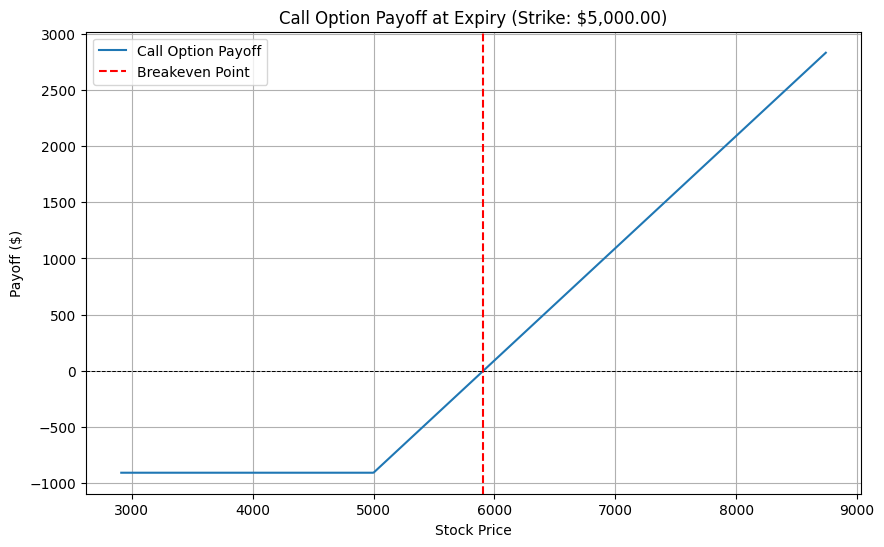

In [8]:
# Call Option Plot
X_call = calls['strike'].iloc[0]  # Using first strike price
premium_call = calls['lastPrice'].iloc[0]

# Create stock price range based on current price
price_range = 0.5  # 50% above and below current price
StockPrice = np.linspace(current_price * (1 - price_range),
                        current_price * (1 + price_range),
                        1000)

# Calculate payoff (vectorized)
Payoff_Call = payoff('C', premium_call, StockPrice, X_call)

# Plot the call option payoff
plt.figure(figsize=(10, 6))
plt.plot(StockPrice, Payoff_Call, label='Call Option Payoff')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=X_call + premium_call, color='red', linestyle='--', label='Breakeven Point')
plt.xlabel('Stock Price')
plt.ylabel('Payoff ($)')
plt.title(f'Call Option Payoff at Expiry (Strike: ${X_call:,.2f})')
plt.legend()
plt.grid(True)
plt.show()

**Plot for Put Option**

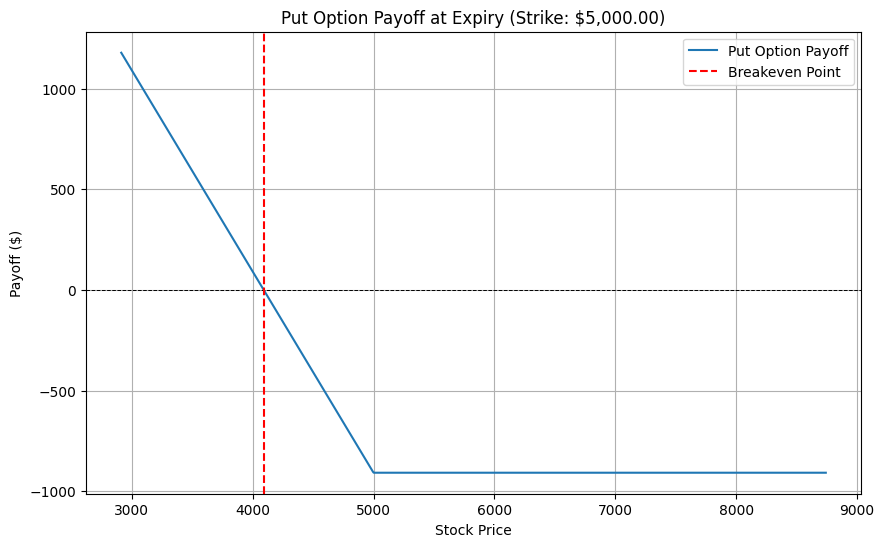

In [9]:
# Put Option Plot
X_put = puts['strike'].iloc[-1]  # Using last strike price
premium_put = puts['lastPrice'].iloc[-1]

# Create stock price range based on current price
price_range = 0.5  # 50% above and below current price
StockPrice = np.linspace(current_price * (1 + price_range),
                        current_price * (1 - price_range),
                        1000)

# Calculate payoff (vectorized)
Payoff_Call = payoff('P', premium_call, StockPrice, X_call)

# Plot the call option payoff
plt.figure(figsize=(10, 6))
plt.plot(StockPrice, Payoff_Call, label='Put Option Payoff')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=X_call - premium_call, color='red', linestyle='--', label='Breakeven Point')
plt.xlabel('Stock Price')
plt.ylabel('Payoff ($)')
plt.title(f'Put Option Payoff at Expiry (Strike: ${X_call:,.2f})')
plt.legend()
plt.grid(True)
plt.show()

**Checking for ITM,OTM,ATM**

In [10]:
# Option Classification function
def classify_option(S, X):
    """
    Classify option as ITM, ATM, or OTM based on current stock price(S) and strike price(X)
    """
    if S > X:
        return "In the Money (ITM)"
    elif S==X:
        return "At the Money (ATM)"
    else:
        return "Out of the Money (OTM)"


In [11]:
# Example classification
classification_call = classify_option(current_price, X_call)
classification_put = classify_option(current_price, X_put)
print(f"\nCall Option Classification: {classification_call}")
print(f"Put Option Classification: {classification_put}")


Call Option Classification: In the Money (ITM)
Put Option Classification: Out of the Money (OTM)


**Put Call Parity Validation**

In [12]:
# Put-Call Parity Validation
def validate_put_call_parity(S, X, premium_call, premium_put, r=0.05, T=1):
    """
    Validate Put-Call Parity relationship

    Parameters:
    S: Current stock price
    X: Strike price
    premium_call: Call option premium
    premium_put: Put option premium
    r: Risk-free interest rate (default 5%)
    T: Time to maturity in years (default 1 year)
    """
    left_hand_side = premium_call + X * np.exp(-r * T)
    right_hand_side = premium_put + S
    return np.isclose(left_hand_side, right_hand_side, rtol=1e-2)


**Check put-call parity**

In [13]:
# Check put-call parity
is_parity_valid = validate_put_call_parity(current_price, X_call, premium_call, premium_put)
print(f"\nDoes Put-Call Parity Hold? {is_parity_valid}")


Does Put-Call Parity Hold? False
